In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib

In [2]:
x = np.array([152, 161, 163, 167, 169, 176, 175, 177, 183, 190, 189, 191, 195, 208, 207, 207, 215, 212, 214, 225, 216, 222, 219, 214, 219, 222, 219, 217, 215, 217, 208, 208, 207, 202, 193, 193, 191, 186, 186, 184, 174, 172, 168, 166, 158, 157, 148, 146, 136, 134, 133, 129, 128, 126, 126, 124, 127, 128, 129, 130, 138, 137, 141, 144, 148, 153, 157, 163, 171, 172, 176, 179, 182, 191, 193, 193, 202, 211, 209, 219, 216, 221, 216, 222, 226, 226, 222, 230, 229, 229, 224, 223, 223, 219, 213, 219, 214, 209, 203, 202, 191, 189, 188, 179, 176, 169, 163, 163, 151, 150, 145, 136, 135, 132, 129, 126, 125, 125, 121, 120, 122, 122, 123, 124, 124, 124, 129, 127, 133, 136, 135, 140, 146, 150, 154, 158, 166, 168, 173, 175, 185, 185, 188, 190, 197, 199, 204, 207, 208, 206, 205, 214, 214, 216, 219, 222, 223, 219, 220, 222, 219, 228, 219, 216, 213, 216, 214, 210, 210, 206, 201, 188, 180, 171, 163, 159, 149, 148, 144, 139, 132, 131, 126, 124, 122, 121, 121, 119, 118, 117, 117, 117, 120, 119, 117, 118, 120, 118, 119, 121, 119, 122, 124, 123, 125, 126, 128, 134, 134, 136, 142, 140, 150, 151, 157, 162, 165, 167, 173, 176, 180, 182, 189, 190, 192, 203, 202, 206, 207, 214, 214, 221, 217, 213, 225, 221, 227, 225, 218, 221, 220, 218, 208, 209, 207, 205, 201, 197, 193, 188, 180, 179, 175, 169, 170, 161, 159, 153, 147, 140, 140, 134, 132, 132, 128, 126, 126, 124, 124, 123, 125, 127, 125, 132, 130, 135, 135, 138, 141, 146, 147, 149, 157, 159, 162, 162, 165, 172, 175, 180, 181, 184, 186, 193, 199, 206, 204, 212, 207, 208, 213, 214, 224, 216, 220, 218, 220, 225, 222, 217, 214, 214, 214, 212, 219, 214, 217, 225, 217, 197, 193, 184, 179, 175, 166, 157, 151, 145, 138, 134, 129, 123, 123, 117, 118, 117, 114, 113, 115, 113, 116, 117, 118, 118, 120, 122, 121, 125, 126, 129, 133, 137, 140, 146, 147, 156, 159, 164, 174, 179, 185, 188, 185, 185, 190, 190, 196, 194, 205, 203, 206, 211, 210, 217, 217, 212, 215, 213, 218, 221, 223, 215, 213, 215, 212, 209, 212, 208, 202, 198, 191, 187, 185, 182, 175, 169, 164, 161, 157, 150, 146, 145, 141, 136, 135, 134, 132, 129, 129, 130, 129, 126, 129, 128, 134, 131, 135, 138, 143, 147, 149, 152, 157, 158, 162, 163, 168, 174, 175, 181, 184, 191, 193, 196, 199, 205, 208, 209, 215, 214, 214, 214, 218, 225, 216, 217, 219, 214, 219, 211, 219, 214, 212, 213, 207, 205, 199, 200, 190, 187, 181, 180, 176, 171, 166, 160, 154, 150, 146, 140, 140, 135, 132, 129, 128, 129, 126, 126, 124, 125, 125, 127, 130, 130, 135, 135, 139, 141, 145, 154, 151, 161, 159, 163, 168, 173, 174, 176, 184, 189, 191, 198, 197, 206, 202, 203, 221, 210, 214, 214, 219, 219, 221, 225, 217, 222, 224, 221, 214, 213, 214, 214, 205, 204, 196, 197, 192, 188, 171, 173, 168, 166, 157, 150, 148, 141, 138, 134, 132, 126, 129, 125, 123, 127, 123, 123, 128, 131, 131, 134, 137, 143, 144, 149, 154, 157, 163, 163, 167, 178, 180, 177, 190, 193, 197, 197, 197, 206, 206, 216, 214, 214, 218, 220, 223, 215, 214, 219, 219, 222, 219, 214, 208, 214, 203, 206, 205, 196, 202, 196, 185, 187, 175, 174, 171, 163, 157, 156, 154, 149, 146, 141, 136, 135, 133, 129, 129, 129, 127, 127, 126, 128, 131, 129, 129, 136, 133, 136, 144, 145, 147, 152, 153, 162, 163, 166, 167, 174, 181, 185, 184, 194, 196, 200, 207, 206, 211, 210, 211, 220, 213, 220, 225, 215, 225, 225, 225, 218, 220, 216, 209, 208, 210, 206, 200, 197, 190, 187, 184, 181, 171, 168, 164, 154, 151, 143, 139, 139, 134, 133, 127, 128, 123, 123, 123, 126, 126, 126, 129, 131, 134])
u = np.array([42, 51, 53, 57, 59, 66, 65, 67, 73, 80, 79, 81, 85, 98, 97, 97, 105, 102, 104, 115, 106, 112, 109, 104, 109, 112, 109, 107, 105, 107, 98, 98, 97, 92, 83, 83, 81, 76, 76, 74, 64, 62, 58, 56, 48, 47, 38, 36, 26, 24, 23, 19, 18, 16, 16, 14, 17, 18, 19, 20, 28, 27, 31, 34, 38, 43, 47, 53, 61, 62, 66, 69, 72, 81, 83, 83, 92, 101, 99, 109, 106, 111, 106, 112, 116, 116, 112, 120, 119, 119, 114, 113, 113, 109, 103, 109, 104, 99, 93, 92, 81, 79, 78, 69, 66, 59, 53, 53, 41, 40, 35, 26, 25, 22, 19, 16, 15, 15, 11, 10, 12, 12, 13, 14, 14, 14, 19, 17, 23, 26, 25, 30, 36, 40, 44, 48, 56, 58, 63, 65, 75, 75, 78, 80, 87, 89, 94, 97, 98, 96, 95, 104, 104, 106, 109, 112, 113, 109, 110, 112, 109, 118, 109, 106, 103, 106, 104, 100, 100, 96, 91, 78, 70, 61, 53, 49, 39, 38, 34, 29, 22, 21, 16, 14, 12, 11, 11, 9, 8, 7, 7, 7, 10, 9, 7, 8, 10, 8, 9, 11, 9, 12, 14, 13, 15, 16, 18, 24, 24, 26, 32, 30, 40, 41, 47, 52, 55, 57, 63, 66, 70, 72, 79, 80, 82, 93, 92, 96, 97, 104, 104, 111, 107, 103, 115, 111, 117, 115, 108, 111, 110, 108, 98, 99, 97, 95, 91, 87, 83, 78, 70, 69, 65, 59, 60, 51, 49, 43, 37, 30, 30, 24, 22, 22, 18, 16, 16, 14, 14, 13, 15, 17, 15, 22, 20, 25, 25, 28, 31, 36, 37, 39, 47, 49, 52, 52, 55, 62, 65, 70, 71, 74, 76, 83, 89, 96, 94, 102, 97, 98, 103, 104, 114, 106, 110, 108, 110, 115, 112, 107, 104, 104, 104, 102, 109, 104, 107, 115, 107, 87, 83, 74, 69, 65, 56, 47, 41, 35, 28, 24, 19, 13, 13, 7, 8, 7, 4, 3, 5, 3, 6, 7, 8, 8, 10, 12, 11, 15, 16, 19, 23, 27, 30, 36, 37, 46, 49, 54, 64, 69, 75, 78, 75, 75, 80, 80, 86, 84, 95, 93, 96, 101, 100, 107, 107, 102, 105, 103, 108, 111, 113, 105, 103, 105, 102, 99, 102, 98, 92, 88, 81, 77, 75, 72, 65, 59, 54, 51, 47, 40, 36, 35, 31, 26, 25, 24, 22, 19, 19, 20, 19, 16, 19, 18, 24, 21, 25, 28, 33, 37, 39, 42, 47, 48, 52, 53, 58, 64, 65, 71, 74, 81, 83, 86, 89, 95, 98, 99, 105, 104, 104, 104, 108, 115, 106, 107, 109, 104, 109, 101, 109, 104, 102, 103, 97, 95, 89, 90, 80, 77, 71, 70, 66, 61, 56, 50, 44, 40, 36, 30, 30, 25, 22, 19, 18, 19, 16, 16, 14, 15, 15, 17, 20, 20, 25, 25, 29, 31, 35, 44, 41, 51, 49, 53, 58, 63, 64, 66, 74, 79, 81, 88, 87, 96, 92, 93, 111, 100, 104, 104, 109, 109, 111, 115, 107, 112, 114, 111, 104, 103, 104, 104, 95, 94, 86, 87, 82, 78, 61, 63, 58, 56, 47, 40, 38, 31, 28, 24, 22, 16, 19, 15, 13, 17, 13, 13, 18, 21, 21, 24, 27, 33, 34, 39, 44, 47, 53, 53, 57, 68, 70, 67, 80, 83, 87, 87, 87, 96, 96, 106, 104, 104, 108, 110, 113, 105, 104, 109, 109, 112, 109, 104, 98, 104, 93, 96, 95, 86, 92, 86, 75, 77, 65, 64, 61, 53, 47, 46, 44, 39, 36, 31, 26, 25, 23, 19, 19, 19, 17, 17, 16, 18, 21, 19, 19, 26, 23, 26, 34, 35, 37, 42, 43, 52, 53, 56, 57, 64, 71, 75, 74, 84, 86, 90, 97, 96, 101, 100, 101, 110, 103, 110, 115, 105, 115, 115, 115, 108, 110, 106, 99, 98, 100, 96, 90, 87, 80, 77, 74, 71, 61, 58, 54, 44, 41, 33, 29, 29, 24, 23, 17, 18, 13, 13, 13, 16, 16, 16, 19, 21, 24])
T = 0.05
N = len(x)
t = np.linspace(start=0, stop=(N-1)*T, num=N)

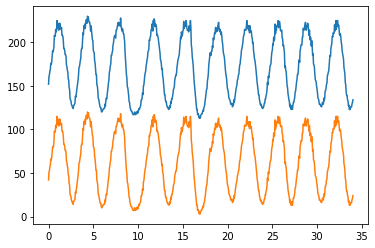

In [3]:
plt.plot(t, x)
plt.plot(t, u)

[152, 180.0]


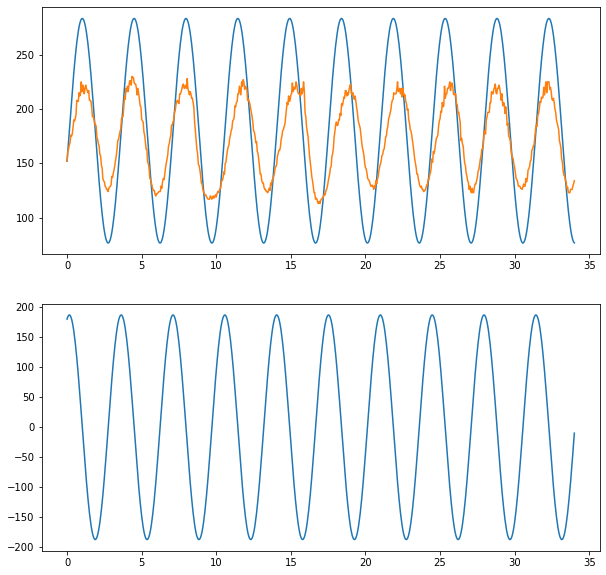

In [54]:
def model(x, t, A, B, T):
    dx0 = x[1]
    dx1 = A*(B-x[0])
    dx = [dx0, dx1]
    return dx
x0 = [x[0], (x[1]-x[0])/T]
print(x0)
x_s = odeint(model, x0, t, args=(3.27, 180, T))

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 1, 1)
plt.plot(t, x_s[:,0])
plt.plot(t, x)
fig.add_subplot(2, 1, 2)
plt.plot(t, x_s[:,1])

In [52]:
def func(X, x, t, T):
    A = X[0]
    B = X[1]
    x0_0 = X[2]
    x0_1 = X[3]
    
    x_s = odeint(model, [x0_0, x0_1], t, args=(A, B, T))
    rms = np.sqrt(np.mean((x-x_s[:,0])**2))
    return rms

minimum  = optimize.fmin(func, [3.25, 180, x[0], (x[1]-x[0])/T], args=(x, t, T))
minimum

Optimization terminated successfully.
         Current function value: 15.121817
         Iterations: 121
         Function evaluations: 234


array([  3.25414334, 172.1537595 , 152.7692366 ,  74.75637563])

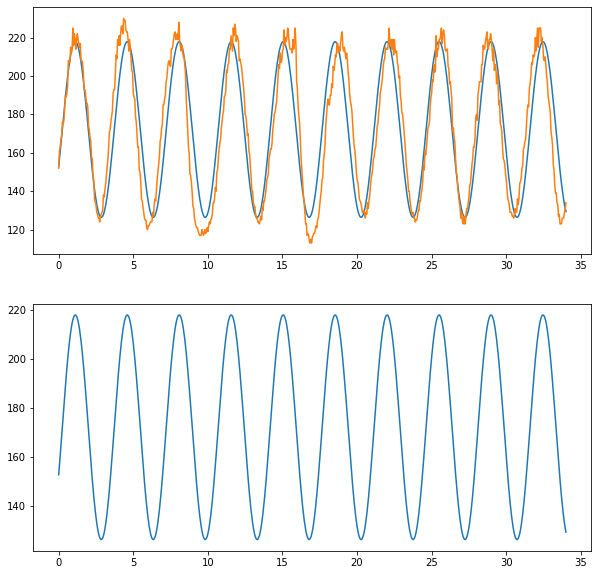

In [53]:
x_s = odeint(model, [minimum[2], minimum[3]], t, args=(minimum[0], minimum[1], T))

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 1, 1)
plt.plot(t, x_s[:,0])
plt.plot(t, x)
fig.add_subplot(2, 1, 2)
plt.plot(t, x_s[:,0])

[152, 180.0, 28]


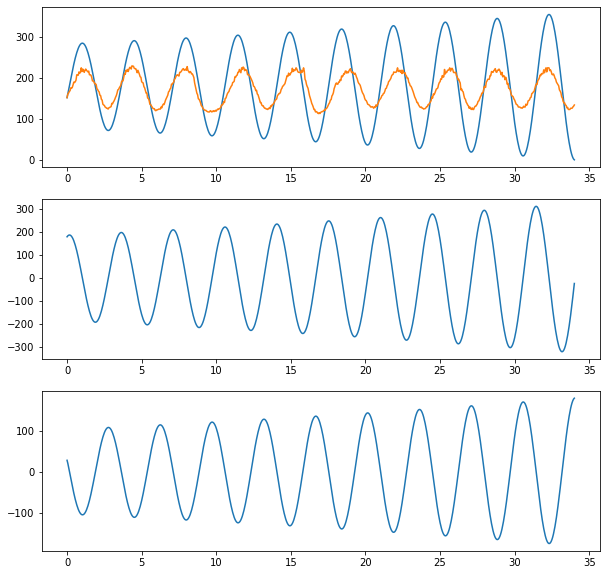

In [57]:
def model2(x, t, A, B, C, T):
    dx0 = x[1]
    dx1 = A*x[2]
    dx2 = -1/C*x[2]+1/C*(B-x[0])
    dx = [dx0, dx1, dx2]
    return dx

x0 = [x[0], (x[1]-x[0])/T, 180-x[0]]
print(x0)
x_s = odeint(model2, x0, t, args=(3.27, 180, 0.01, T))

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(3, 1, 1)
plt.plot(t, x_s[:,0])
plt.plot(t, x)
fig.add_subplot(3, 1, 2)
plt.plot(t, x_s[:,1])
fig.add_subplot(3, 1, 3)
plt.plot(t, x_s[:,2])

In [77]:
def func2(X, x, t, T):
    A = X[0]
    B = X[1]
    C = X[2]
    x0_0 = X[3]
    x0_1 = X[4]
    x0_2 = X[5]
    
    x_s = odeint(model2, [x0_0, x0_1, x0_2], t, args=(A, B, C, T))
    rms = np.sqrt(np.mean((x-x_s[:,0])**2))
    return rms

minimum2  = optimize.fmin(func2, [1, 172, 0.2, x[0], (x[1]-x[0])/T, 180-x[0]], args=(x, t, T))
minimum2

<ipython-input-57-ea3658e46e9d>:4: RuntimeWarning: overflow encountered in double_scalars
  dx2 = -1/C*x[2]+1/C*(B-x[0])
C:\Users\rafko\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-77-2b0e2801abeb>:10: RuntimeWarning: overflow encountered in square
  rms = np.sqrt(np.mean((x-x_s[:,0])**2))
C:\Users\rafko\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\rafko\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Optimization terminated successfully.
         Current function value: 16.588071
         Iterations: 578
         Function evaluations: 955


array([3.29966117e+00, 1.68293118e+02, 2.77333334e-10, 1.36072925e+02,
       6.21210766e+01, 1.43316504e+01])

[136.07292549071545, 62.12107660784761, 14.331650441823196]


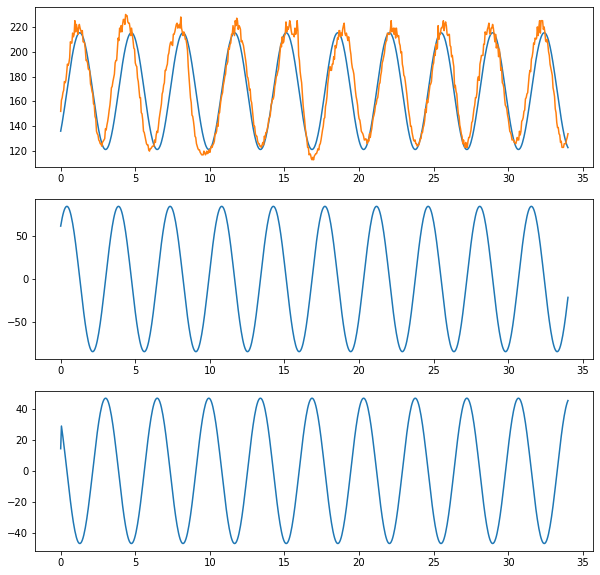

In [78]:
x0 = [minimum2[3], minimum2[4], minimum2[5]]
print(x0)

x_s = odeint(model2, x0, t, args=(minimum2[0], minimum2[1], minimum2[2], T))

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(3, 1, 1)
plt.plot(t, x_s[:,0])
plt.plot(t, x)
fig.add_subplot(3, 1, 2)
plt.plot(t, x_s[:,1])
fig.add_subplot(3, 1, 3)
plt.plot(t, x_s[:,2])